# create group of mall customers based on their annual income and spending score

In [55]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.metrics import *
from scipy.cluster import hierarchy as sch
sns.set()

In [56]:
dataframe = pd.read_csv('Data/Mall_Customers.csv')

In [57]:
dataframe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


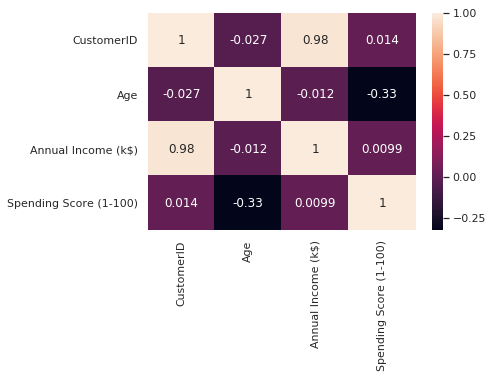

In [58]:
sns.heatmap(dataframe.corr(),annot=True)

In [59]:
# as question states group by Anunual income and Spending salary hence we'll select the same 2 columns here

In [60]:
X = dataframe.iloc[:,[3,4]]

In [61]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0,0.5,'Eucledian distance')

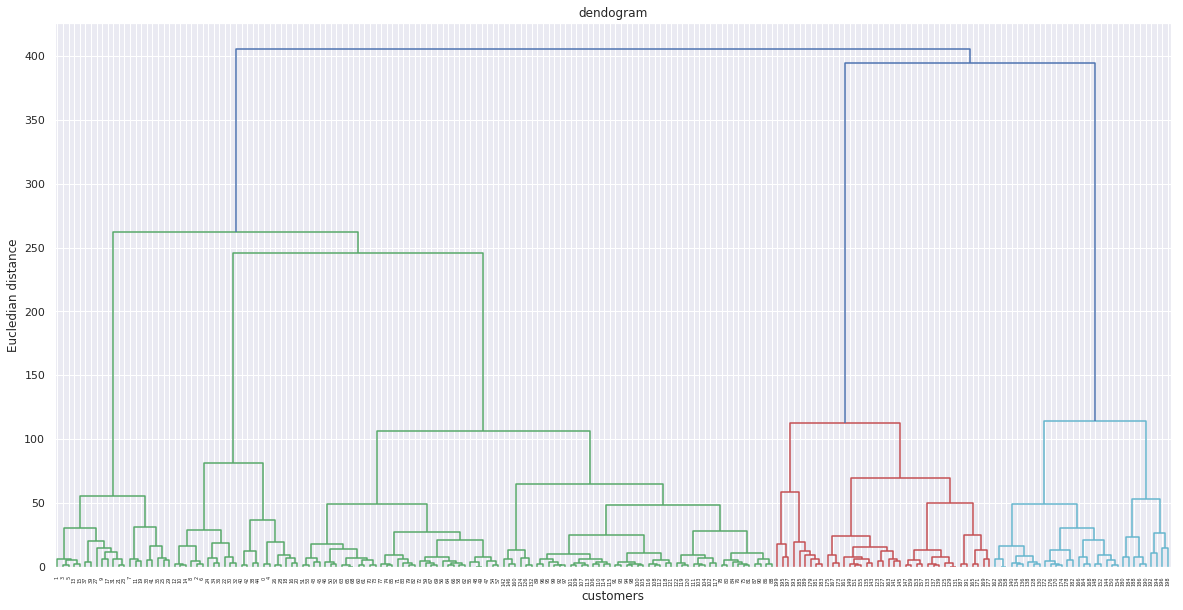

In [62]:
plt.figure(figsize=(20,10))
dendagram = sch.dendrogram(sch.linkage(X,method='ward'))
# linakge is algo for heirarchical clustering 
# war tries to minimise variance  in each cluster
plt.title('dendogram')
plt.xlabel('customers')
plt.ylabel('Eucledian distance')


In [63]:
hie_clus = AgglomerativeClustering(affinity='euclidean',linkage='ward',n_clusters=5)
# n_clusters is 5 as per above graph drawn


# As we see above the longest line is the right most so we consider that line and then move down till  we see the first horizontal line cuts it
# As soon as it cuts we consider the area just above it for the clusterting and at that point we draw a line
# We count number of vertical lines just below our horizontal drawn line and that is the best value of number of clusters

In [64]:
hie_clus.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x7f846c100e18>)

In [65]:
file = open('Data/hierachical_clustering.pkl','wb')
pickle.dump(hie_clus,file)
file.close()